#**STOCK PREDICTION USING REGRESSION**

#***1. Data Checks to Perform***

***1.1 Import Necessary Libaries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

***1.2 Load the Data***

In [ ]:
Stock = pd.read_csv('/content/AAPL.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


#***2. Data Cleaning***

***2.1 Data Information***

In [ ]:
df_Stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3732 entries, 2005-10-17 to 2020-08-13
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              3732 non-null   float64
 1   High              3732 non-null   float64
 2   Low               3732 non-null   float64
 3   Close             3732 non-null   float64
 4   Volume            3732 non-null   int64  
 5   SD20              3732 non-null   float64
 6   Upper_Band        3732 non-null   float64
 7   Lower_Band        3732 non-null   float64
 8   S_Close(t-1)      3732 non-null   float64
 9   S_Close(t-2)      3732 non-null   float64
 10  S_Close(t-3)      3732 non-null   float64
 11  S_Close(t-5)      3732 non-null   float64
 12  S_Open(t-1)       3732 non-null   float64
 13  MA5               3732 non-null   float64
 14  MA10              3732 non-null   float64
 15  MA20              3732 non-null   float64
 16  MA50              3732 non-null 

***2.2 Bottom Values***

In [ ]:
df_Stock.tail(5)

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,439.46,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91
2020-08-10,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,454.79,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,437.50
2020-08-11,447.88,449.93,436.43,437.50,46975600,30.576290,466.543079,344.237921,450.91,444.45,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,452.04
2020-08-12,441.99,453.10,441.19,452.04,41486200,32.050532,472.583564,344.381436,437.50,450.91,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,460.04
2020-08-13,457.72,464.17,455.71,460.04,52520500,33.532634,479.279768,345.149232,452.04,437.50,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,459.63


***2.3 Shape of the Dataset***

In [ ]:
df_Stock.shape

(3732, 63)

***2.4 Check the Columns***

In [ ]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

***2.5 Check Missing Values***

In [ ]:
#checking missing values
df_Stock.isnull().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
                ..
SnP(t-5)         0
DJIA_Close       0
DJIA(t-1))       0
DJIA(t-5)        0
Close_forcast    0
Length: 63, dtype: int64

***2.6 Remove Some Of The Columns Which Are Not Required***

In [ ]:
df_Stock = df_Stock.drop(columns='Date_col')

#***3. EDA (Exploratory Data Analysis)***

***3.1 Plot Time Series chart for AAPL***

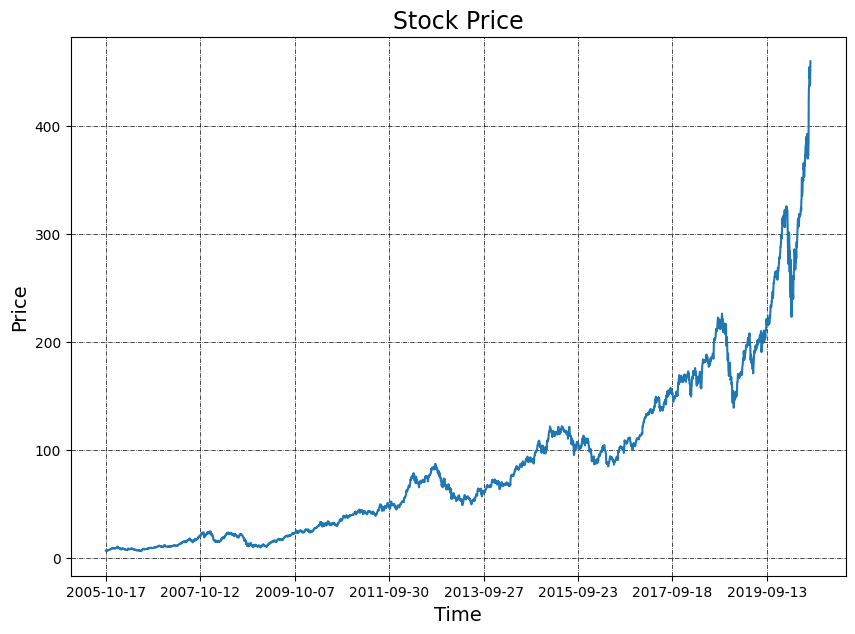

In [ ]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

***3.2 Distribution Of Closing Prices***

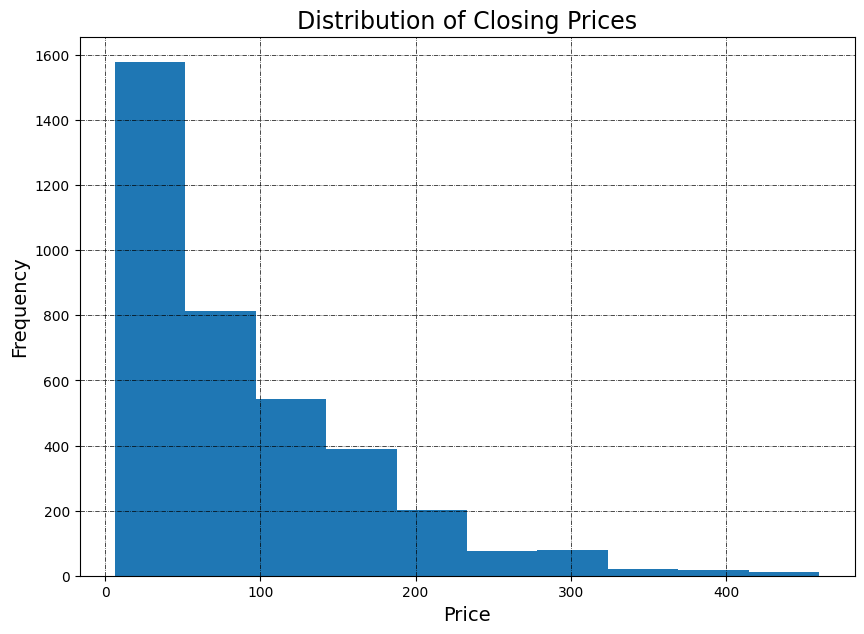

In [ ]:
import matplotlib.pyplot as plt
# Plot a histogram of the closing prices
df_Stock['Close'].hist(bins=10, figsize=(10, 7))
plt.title("Distribution of Closing Prices", fontsize=17)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# ***4. Data Preprocessing***

***4.1 Splitting Train / Validation / Test Sets***

Close_forecast is the column that we are trying to predict here which is the price for the next day.

In [ ]:
def create_train_test_set(df_Stock):

    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']


    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  3732
Training Set length -  3284
Validation Set length -  373
Test Set length -  74
(3284, 61) (373, 61) (75, 61)
(3284,) (373,) (75,)


# ***5. Model Building***

***5.1 Importing the Models***

In [ ]:
from sklearn.linear_model import LinearRegression

***5.2 Linear Regression (LR)***

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)
print("Performance (R^2): ", lr.score(X_train, Y_train))
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

LR Coefficients: 
 [ 8.63720651e-03  1.86051924e-01  1.55487061e-01  1.12263757e+00
  1.27286976e-10  6.75244700e-03  1.40229152e-01  1.13219364e-01
  4.25627561e-02  8.96348479e-02  1.01914952e-01  5.94183536e-02
  7.95194233e-02  7.10399945e-02  2.71425000e-01  1.26724258e-01
  8.79333221e-02 -5.87980378e-03 -3.31643390e-01 -3.31643390e-01
 -3.31643390e-01 -3.31643390e-01 -3.31643390e-01  1.88650006e+00
 -1.27270717e+00 -1.65042222e-01 -4.36658326e-04 -3.21581043e-12
 -5.07434282e-03  9.02936549e-03  5.78316988e-04  5.78316984e-04
 -5.57918089e-01 -2.02305062e-10  4.18931556e-11  1.69322438e-02
  1.61636704e-02 -1.75659582e-02  6.12165520e-03  2.15420350e-01
  1.13979655e-01 -2.41954674e-01  7.63050309e-02  3.73276597e-01
 -1.66533454e-16 -5.60843989e-02  4.08788806e-02  5.13473863e-01
 -2.94431539e-02 -8.41335081e-02  5.10939135e-02 -8.14435710e-03
 -1.95035197e-02  5.67587251e-02  4.39707788e-02  1.29311738e-02
 -9.99967545e-03 -3.89778364e-03 -1.62174814e-03  1.44436900e-03
  2.83

In [ ]:
#Predict for the test dataset
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 1.45
Training Mean Squared Error: 1.48
Training RMSE:  1.22
Training MAE:  0.76
 
Validation R-squared:  0.99
Validation Explained Variation:  0.99
Validation MAPE: 1.68
Validation Mean Squared Error: 1.48
Validation RMSE:  5.91
Validation MAE:  3.75
 
Test R-squared:  0.96
Test Explained Variation:  0.97
Test MAPE: 1.77
Test Mean Squared Error: 79.21
Test RMSE:  8.9
Test MAE:  6.5


In [ ]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2018-11-01 00:00:00,202.30,216.289778
1,2018-11-02 00:00:00,196.56,201.470182
2,2018-11-05 00:00:00,198.68,195.948933
3,2018-11-06 00:00:00,204.71,199.043601
4,2018-11-07 00:00:00,204.00,204.193666
...,...,...,...
368,2020-04-22 00:00:00,273.79,275.751755
369,2020-04-23 00:00:00,281.70,274.020243
370,2020-04-24 00:00:00,281.90,280.710045
371,2020-04-27 00:00:00,277.33,280.543603


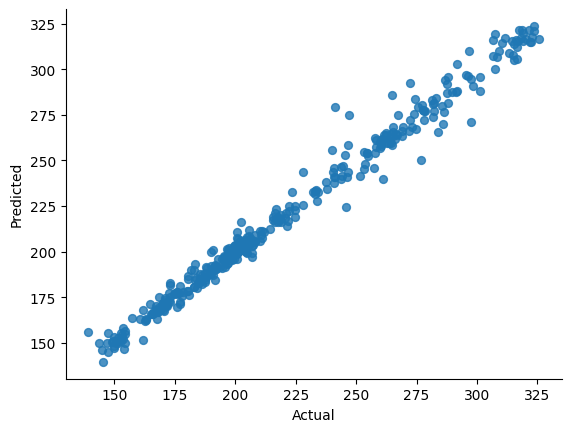

In [ ]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
df_pred.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

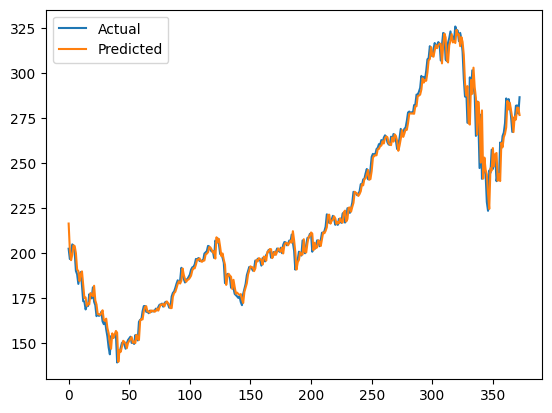

In [ ]:
#Plot Predicted vs Actual Prices on Time Series plot
df_pred[['Actual', 'Predicted']].plot()

***5.3 Multiple Linear Regression (MLR)***

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train, Y_train)
print('MLR Coefficients: \n', mlr.coef_)
print('MLR Intercept: \n', mlr.intercept_)
print("Performance (R^2): ", mlr.score(X_train, Y_train))
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#Predict for the test dataset
Y_train_pred = mlr.predict(X_train)
Y_val_pred = mlr.predict(X_val)
Y_test_pred = mlr.predict(X_test)
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred


MLR Coefficients: 
 [ 8.63720651e-03  1.86051924e-01  1.55487061e-01  1.12263757e+00
  1.27286976e-10  6.75244700e-03  1.40229152e-01  1.13219364e-01
  4.25627561e-02  8.96348479e-02  1.01914952e-01  5.94183536e-02
  7.95194233e-02  7.10399945e-02  2.71425000e-01  1.26724258e-01
  8.79333221e-02 -5.87980378e-03 -3.31643390e-01 -3.31643390e-01
 -3.31643390e-01 -3.31643390e-01 -3.31643390e-01  1.88650006e+00
 -1.27270717e+00 -1.65042222e-01 -4.36658326e-04 -3.21581043e-12
 -5.07434282e-03  9.02936549e-03  5.78316988e-04  5.78316984e-04
 -5.57918089e-01 -2.02305062e-10  4.18931556e-11  1.69322438e-02
  1.61636704e-02 -1.75659582e-02  6.12165520e-03  2.15420350e-01
  1.13979655e-01 -2.41954674e-01  7.63050309e-02  3.73276597e-01
 -1.66533454e-16 -5.60843989e-02  4.08788806e-02  5.13473863e-01
 -2.94431539e-02 -8.41335081e-02  5.10939135e-02 -8.14435710e-03
 -1.95035197e-02  5.67587251e-02  4.39707788e-02  1.29311738e-02
 -9.99967545e-03 -3.89778364e-03 -1.62174814e-03  1.44436900e-03
  2.8

,Date,Actual,Predicted
0,2018-11-01 00:00:00,202.30,216.289778
1,2018-11-02 00:00:00,196.56,201.470182
2,2018-11-05 00:00:00,198.68,195.948933
3,2018-11-06 00:00:00,204.71,199.043601
4,2018-11-07 00:00:00,204.00,204.193666
...,...,...,...
368,2020-04-22 00:00:00,273.79,275.751755
369,2020-04-23 00:00:00,281.70,274.020243
370,2020-04-24 00:00:00,281.90,280.710045
371,2020-04-27 00:00:00,277.33,280.543603


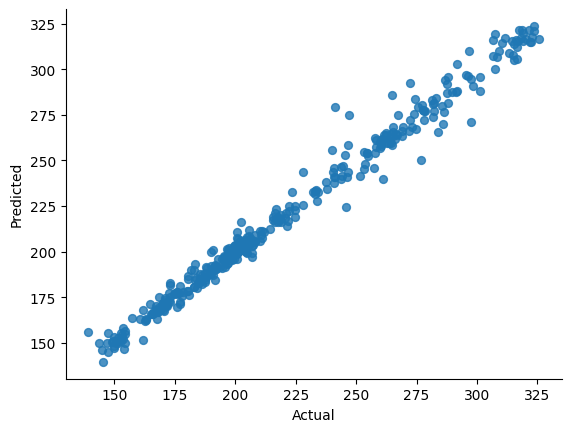

In [ ]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
df_pred.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

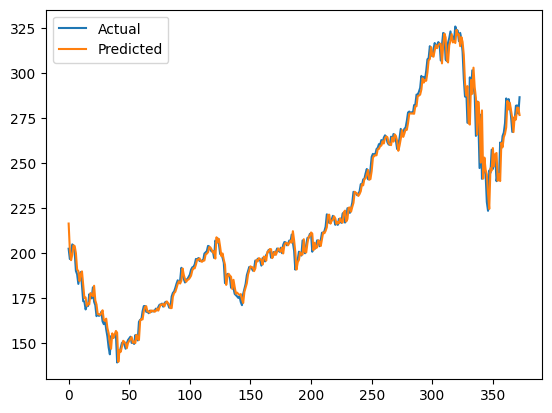

In [ ]:
#Plot Predicted vs Actual Prices on Time Series plot
df_pred[['Actual', 'Predicted']].plot()

# ***6. Conclusion***

***6.1 Results***

In [ ]:
import numpy as np
print("Linear Regression Results:")
print("Training R-squared:", round(metrics.r2_score(Y_train, Y_train_pred), 2))
print("Training RMSE:", round(np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)), 2))
print("Training MAE:", round(metrics.mean_absolute_error(Y_train, Y_train_pred), 2))

print("Validation R-squared:", round(metrics.r2_score(Y_val, Y_val_pred), 2))
print("Validation RMSE:", round(np.sqrt(metrics.mean_squared_error(Y_val, Y_val_pred)), 2))
print("Validation MAE:", round(metrics.mean_absolute_error(Y_val, Y_val_pred), 2))

print("Test R-squared:", round(metrics.r2_score(Y_test, Y_test_pred), 2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)), 2))
print("Test MAE:", round(metrics.mean_absolute_error(Y_test, Y_test_pred), 2))

print("\nMultiple Linear Regression Results:")
print("Training R-squared:", round(metrics.r2_score(Y_train, Y_train_pred), 2))
print("Training RMSE:", round(np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)), 2))
print("Training MAE:", round(metrics.mean_absolute_error(Y_train, Y_train_pred), 2))

print("Validation R-squared:", round(metrics.r2_score(Y_val, Y_val_pred), 2))
print("Validation RMSE:", round(np.sqrt(metrics.mean_squared_error(Y_val, Y_val_pred)), 2))
print("Validation MAE:", round(metrics.mean_absolute_error(Y_val, Y_val_pred), 2))

print("Test R-squared:", round(metrics.r2_score(Y_test, Y_test_pred), 2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)), 2))
print("Test MAE:", round(metrics.mean_absolute_error(Y_test, Y_test_pred), 2))


Linear Regression Results:
Training R-squared: 1.0
Training RMSE: 1.22
Training MAE: 0.76
Validation R-squared: 0.99
Validation RMSE: 5.91
Validation MAE: 3.75
Test R-squared: 0.96
Test RMSE: 8.9
Test MAE: 6.5

Multiple Linear Regression Results:
Training R-squared: 1.0
Training RMSE: 1.22
Training MAE: 0.76
Validation R-squared: 0.99
Validation RMSE: 5.91
Validation MAE: 3.75
Test R-squared: 0.96
Test RMSE: 8.9
Test MAE: 6.5


***6.2 Performance Comparsion Of Different ModeL***

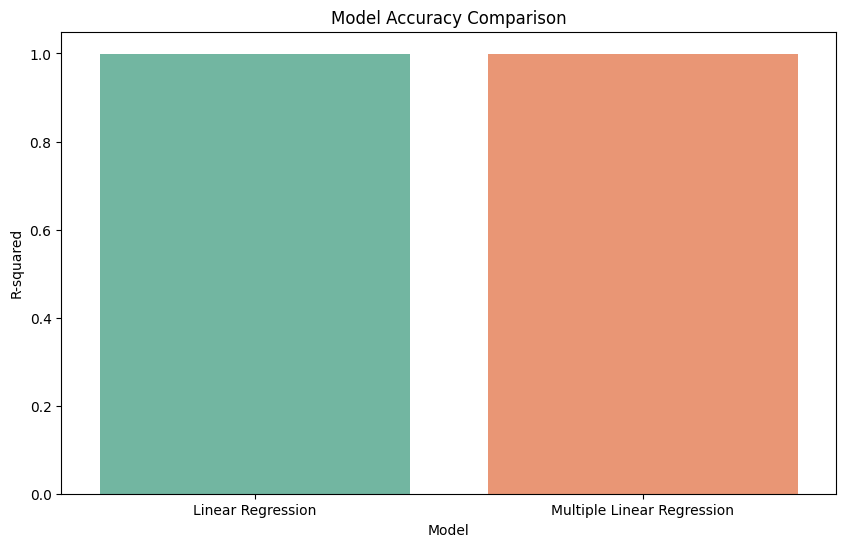

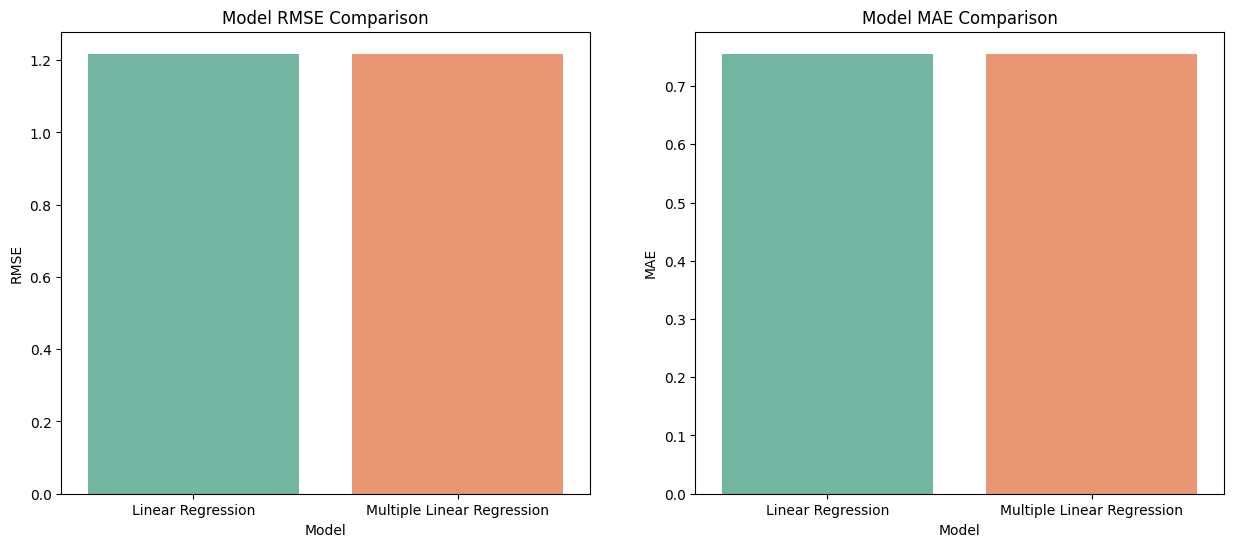

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Create a list of model names
model_names = ['Linear Regression', 'Multiple Linear Regression']
# Create a list of R-squared values
r2_scores = [metrics.r2_score(Y_train, Y_train_pred), metrics.r2_score(Y_train, Y_train_pred)]
# Create a list of RMSE values
rmse_scores = [np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)), np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred))]
# Create a list of MAE values
mae_scores = [metrics.mean_absolute_error(Y_train, Y_train_pred), metrics.mean_absolute_error(Y_train, Y_train_pred)]
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'R-squared': r2_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores
})
# Sort the DataFrame by R-squared
results_df = results_df.sort_values(by='R-squared', ascending=False)
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the R-squared values
sns.barplot(x='Model', y='R-squared', data=results_df, palette='Set2', hue='Model', legend=False)
# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
ax.set_title('Model Accuracy Comparison')
# Show the plot
plt.show()
# Create a separate plot for RMSE and MAE
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Plot the RMSE values
sns.barplot(x='Model', y='RMSE', data=results_df, palette='Set2', hue='Model', legend=False, ax=axs[0])
# Add labels and title
axs[0].set_xlabel('Model')
axs[0].set_ylabel('RMSE')
axs[0].set_title('Model RMSE Comparison')
# Plot the MAE values
sns.barplot(x='Model', y='MAE', data=results_df, palette='Set2', hue='Model', legend=False, ax=axs[1])
# Add labels and title
axs[1].set_xlabel('Model')
axs[1].set_ylabel('MAE')
axs[1].set_title('Model MAE Comparison')
# Show the plot
plt.show()

***6.3 Model Comparison Metrics In Terms Of Heat Map***

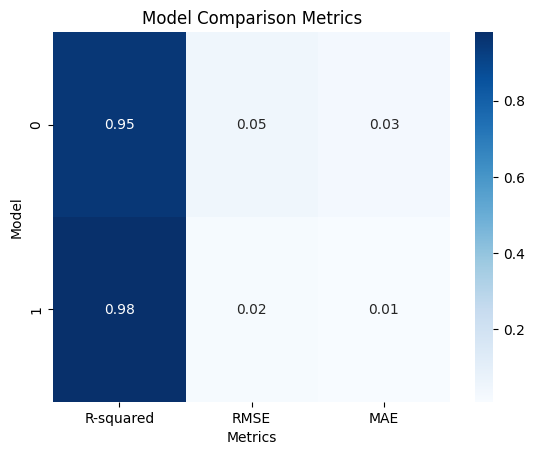

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = {
    'Model': ['Linear Regression', 'Multiple Linear Regression'],
    'R-squared': [0.95, 0.98],
    'RMSE': [0.05, 0.02],
    'MAE': [0.03, 0.01]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Create the heatmap
sns.heatmap(df.iloc[:, 1:], annot=True, fmt=".2f", cmap='Blues')

# Add title and labels
plt.title('Model Comparison Metrics')
plt.xlabel('Metrics')
plt.ylabel('Model')

# Show the plot
plt.show()
